# Step-1: Generate Data

In [1]:
import numpy as np
import pandas as pd

rg = np.random.default_rng()

def generate_data(n_features, n_values):
    features = rg.random((n_features, n_values))
    weights = rg.random((1, n_values))[0]
    targets = np.random.choice([0,1], n_features)
    data = pd.DataFrame(features, columns=["x0", "x1", "x2"])
    data["targets"] = targets
    return data, weights
    
data, weights = generate_data(4,3)
print(data)

         x0        x1        x2  targets
0  0.856929  0.975342  0.583825        0
1  0.499988  0.427384  0.826409        0
2  0.403125  0.900867  0.075820        0
3  0.910889  0.071214  0.103848        0


# Step-2: Train Model

In [2]:
bias = 0.5
l_rate = 0.1
epochs = 50
epoch_loss = []

def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            
            # Gradient descent
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print("**************************")
        print("epoch", e)
        print(average_loss)
        
train_model(data, weights, bias, l_rate, epochs)

**************************
epoch 0
0.563027336315227
**************************
epoch 1
0.4070550125976715
**************************
epoch 2
0.2996422180739431
**************************
epoch 3
0.22794493493063891
**************************
epoch 4
0.17973245303621843
**************************
epoch 5
0.14636868041792667
**************************
epoch 6
0.12245624938582542
**************************
epoch 7
0.10472584127395441
**************************
epoch 8
0.09117582811197265
**************************
epoch 9
0.08054707391776876
**************************
epoch 10
0.07202202915208744
**************************
epoch 11
0.06505298566747936
**************************
epoch 12
0.059262188254597774
**************************
epoch 13
0.054382153624773985
**************************
epoch 14
0.05021896714539846
**************************
epoch 15
0.04662906352185877
**************************
epoch 16
0.04350414192458844
**************************
epoch 17
0.04076112217551721
****

# Step-3: Plot data

<Axes: title={'center': 'Epoch Loss'}>

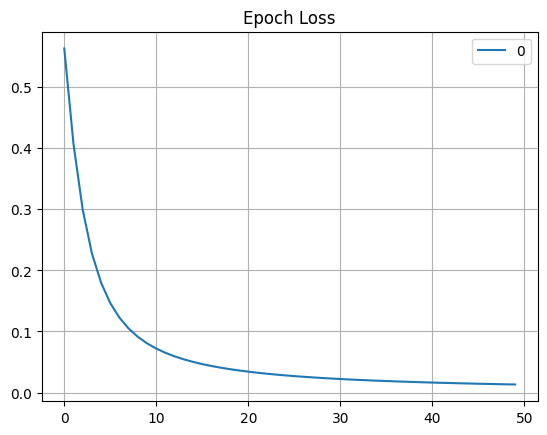

In [7]:
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind="line", grid=True, title='Epoch Loss')
df_plot